# Woche 8: Data Visualization - Übung am eigenen Projekt

**Ziel dieser Übung:** Nachdem Sie die wichtigsten Visualisierungstechniken kennengelernt haben, wenden Sie dieses Wissen Schritt für Schritt auf Ihren eigenen bereinigten Datensatz an.

**Arbeitsweise:**
- Arbeiten Sie die Aufgaben nacheinander durch
- Nutzen Sie die Code-Zellen für Ihre Implementierung
- Orientieren Sie sich an den Beispielen aus dem Airbnb-Notebook
- Erstellen Sie aussagekräftige Visualisierungen für Ihre Forschungsfrage
- Speichern Sie wichtige Visualisierungen als Bilddateien

---
## 1. Bibliotheken importieren und Daten einlesen

**Aufgabe:** Importieren Sie die notwendigen Bibliotheken und laden Sie Ihren bereinigten Datensatz aus Woche 7.

**Hinweise:**
- Importieren Sie: `pandas`, `numpy`, `matplotlib.pyplot`, `seaborn`, `plotly.express`, `plotly.graph_objects`
- Konfigurieren Sie die Visualisierungsstile
- Laden Sie Ihren bereinigten CSV-Datensatz

In [2]:
# Bibliotheken importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Visualisierungsstile konfigurieren
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Bereinigten Datensatz einlesen
df = pd.read_csv('ai_students.csv')

---
## 2. Ersten Überblick verschaffen

**Aufgabe:** Verschaffen Sie sich einen Überblick über Ihren bereinigten Datensatz.

**Was Sie prüfen sollten:**
- Dimensionen des Datensatzes
- Datentypen der Spalten
- Statistische Kennzahlen
- Erste Zeilen anzeigen

In [85]:
# Dimensionen
print(f"Geladen: {df.shape}")

# Erste Zeilen
display(df.head())

# Informationen zu Spalten
print("Informationen zu Spalten und Datentypen:")
df.info()

# Statistische Übersicht
print("Statistische Übersicht numerischer Spalten:")
display(df.describe())


Geladen: (9357, 12)


,Student_ID,Student_Name,Stream,AI_Tools_Used,Daily_Usage_Hours,Use_Cases,Trust_in_AI_Tools,Impact_on_Grades,Preferred_AI_Tool,Year_of_Study,Do_Professors_Allow_Use,Awareness_Level
0,0,aarav,engineering,gemini,0.9,assignments,2,2,copilot,4,no,9
1,0,aarav,engineering,gemini,0.9,coding help,2,2,copilot,4,no,9
2,1,vivaan,commerce,chatgpt,3.4,learning new topics,3,-3,other,2,yes,6
3,2,aditya,science,copilot,3.6,mcq practice,5,0,gemini,2,no,1
4,2,aditya,science,copilot,3.6,projects,5,0,gemini,2,no,1


Informationen zu Spalten und Datentypen:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Student_ID               9357 non-null   int64  
 1   Student_Name             9357 non-null   object 
 2   Stream                   9357 non-null   object 
 3   AI_Tools_Used            9357 non-null   object 
 4   Daily_Usage_Hours        9357 non-null   float64
 5   Use_Cases                9357 non-null   object 
 6   Trust_in_AI_Tools        9357 non-null   int64  
 7   Impact_on_Grades         9357 non-null   int64  
 8   Preferred_AI_Tool        9357 non-null   object 
 9   Year_of_Study            9357 non-null   int64  
 10  Do_Professors_Allow_Use  9357 non-null   object 
 11  Awareness_Level          9357 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 877.3+ KB
Statistische Übersicht numerisch

,Student_ID,Daily_Usage_Hours,Trust_in_AI_Tools,Impact_on_Grades,Year_of_Study,Awareness_Level
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1858.153789,2.542011,3.032489,-0.012931,2.452495,5.816822
std,1085.006006,1.197440,1.452251,2.282418,1.101911,2.937864
min,0.000000,0.500000,1.000000,-5.000000,1.000000,1.000000
25%,852.000000,1.500000,2.000000,-2.000000,1.000000,3.000000
50%,1954.000000,2.600000,3.000000,0.000000,2.000000,6.000000
75%,2838.000000,3.600000,4.000000,2.000000,3.000000,8.000000
max,3613.000000,5.000000,5.000000,5.000000,4.000000,10.000000


---
## 3. Univariate Analysen - Verteilungen einzelner Variablen

**Aufgabe:** Visualisieren Sie die Verteilung einzelner Variablen.

**Für numerische Variablen:**
- Histogramme
- Boxplots
- Violin Plots
- Density Plots

**Für kategoriale Variablen:**
- Bar Charts
- Count Plots
- Pie Charts (bei wenigen Kategorien)

In [86]:
# Numerische Spalten identifizieren
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(f"Numerische Spalten: {list(numeric_cols)}")


Numerische Spalten: ['Student_ID', 'Daily_Usage_Hours', 'Trust_in_AI_Tools', 'Impact_on_Grades', 'Year_of_Study', 'Awareness_Level']


C:\Users\Sinella\AppData\Local\Temp\ipykernel_12268\1079770614.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




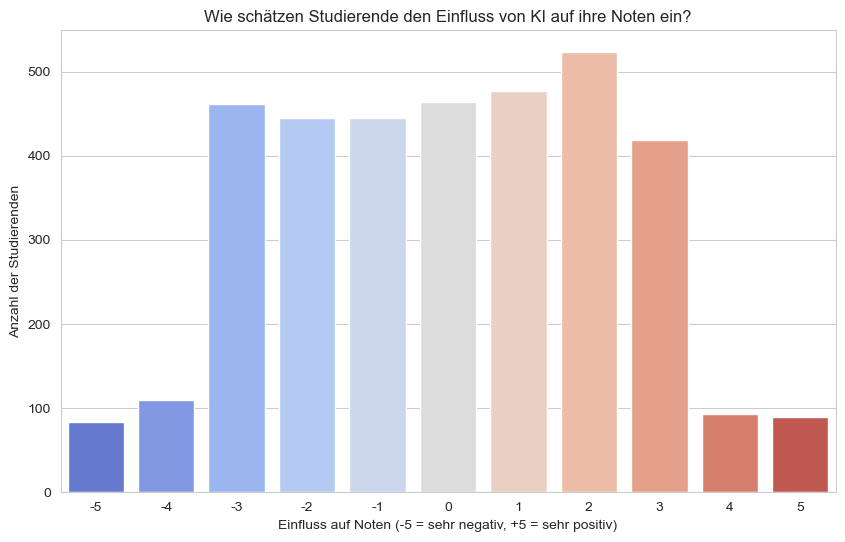

In [87]:
# Verteilung des Einflusses auf die Noten
df_students = df.drop_duplicates(subset='Student_ID') #studis wieder zsmfassen, sonst falsche darstellung

plt.figure(figsize=(10, 6))
sns.countplot(data=df_students, x='Impact_on_Grades', palette='coolwarm')
plt.title('Wie schätzen Studierende den Einfluss von KI auf ihre Noten ein?')
plt.xlabel('Einfluss auf Noten (-5 = sehr negativ, +5 = sehr positiv)')
plt.ylabel('Anzahl der Studierenden')
plt.show()


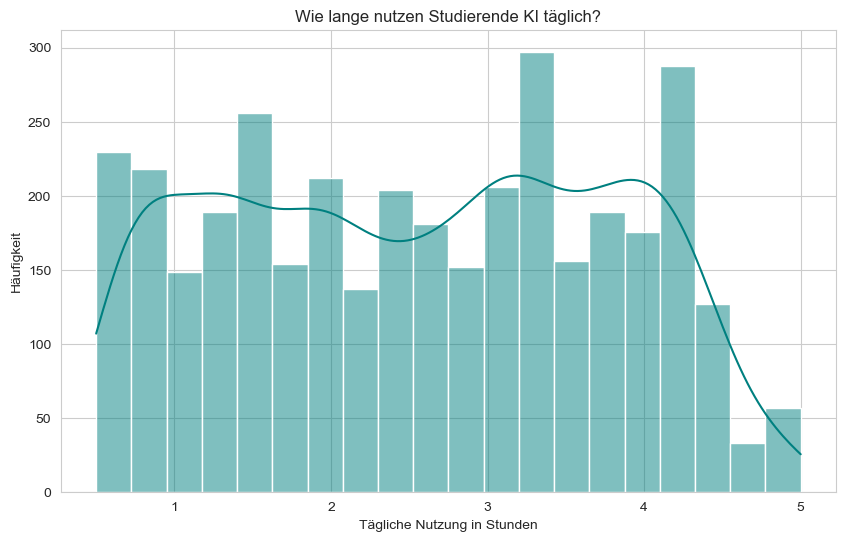

In [88]:
# Verteilung der täglichen Nutzungsdauer
plt.figure(figsize=(10, 6))
sns.histplot(df_students['Daily_Usage_Hours'], bins=20, kde=True, color='teal')
plt.title('Wie lange nutzen Studierende KI täglich?')
plt.xlabel('Tägliche Nutzung in Stunden')
plt.ylabel('Häufigkeit')
plt.show()

In [89]:
# Verteilung der Studiengänge (Interaktiv mit Plotly)
fig = px.pie(df_students, names='Stream', title='Verteilung der Studiengänge im Datensatz')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

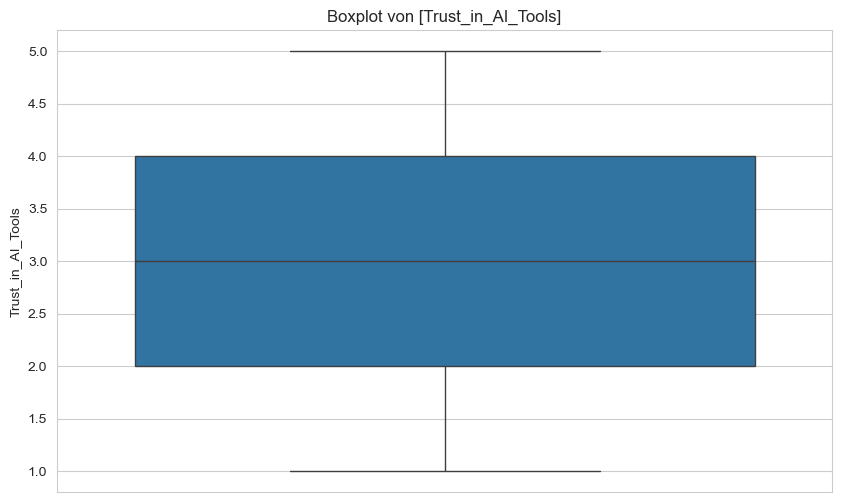

In [90]:
# Beispiel: Boxplot für eine numerische Variable
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_students['Trust_in_AI_Tools'])
plt.title('Boxplot von [Trust_in_AI_Tools]')
plt.show()


In [91]:
# Kategoriale Spalten identifizieren
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(f"Kategoriale Spalten: {list(categorical_cols)}")


Kategoriale Spalten: ['Student_Name', 'Stream', 'AI_Tools_Used', 'Use_Cases', 'Preferred_AI_Tool', 'Do_Professors_Allow_Use']


C:\Users\Sinella\AppData\Local\Temp\ipykernel_12268\2174829981.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




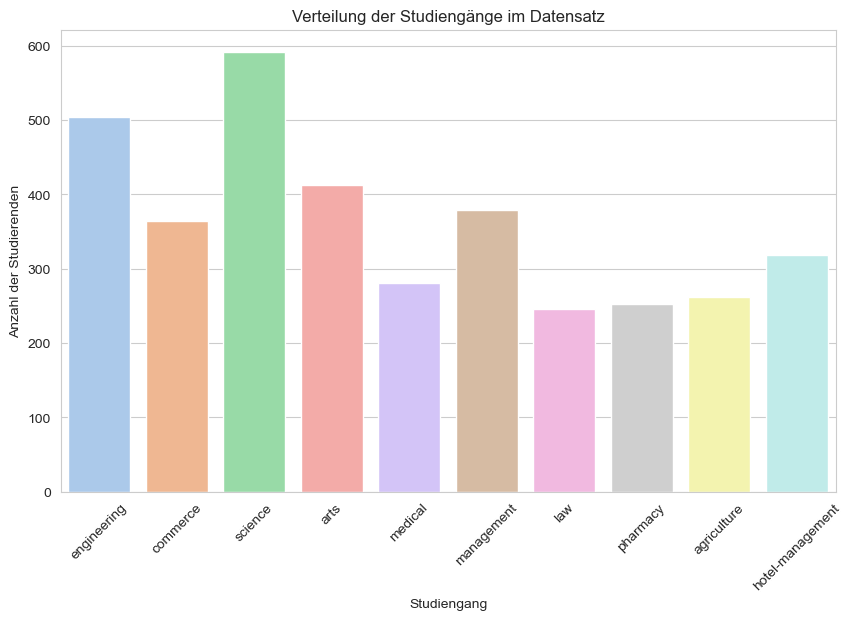

In [92]:
# Beispiel: Count Plot für eine kategoriale Variable
plt.figure(figsize=(10, 6))
sns.countplot(data=df_students, x='Stream', palette = 'pastel')
plt.title('Verteilung der Studiengänge im Datensatz')
plt.xlabel('Studiengang')
plt.ylabel('Anzahl der Studierenden')
plt.xticks(rotation=45)
plt.show()


---
## 4. Bivariate Analysen - Beziehungen zwischen zwei Variablen

**Aufgabe:** Untersuchen Sie Beziehungen zwischen zwei Variablen.

**Mögliche Visualisierungen:**
- Scatter Plots (numerisch vs. numerisch)
- Line Plots (bei Zeitreihen)
- Grouped Bar Charts (kategorial vs. numerisch)
- Box Plots nach Kategorien (kategorial vs. numerisch)
- Violin Plots nach Kategorien

In [93]:
fig = px.scatter(df_students,
                x='Daily_Usage_Hours', 
                y='Impact_on_Grades',
                #color="diag_color",
                color_continuous_scale='Viridis',
                opacity=0.2,
                trendline="ols",
                trendline_color_override="green",
                #color='kategoriale_spalte',
                #size='spalte3',  # optional: Größe nach dritter Variable
                  # zusätzliche Infos beim Hovern
                title='Interaktiver Scatter Plot')
fig.show()

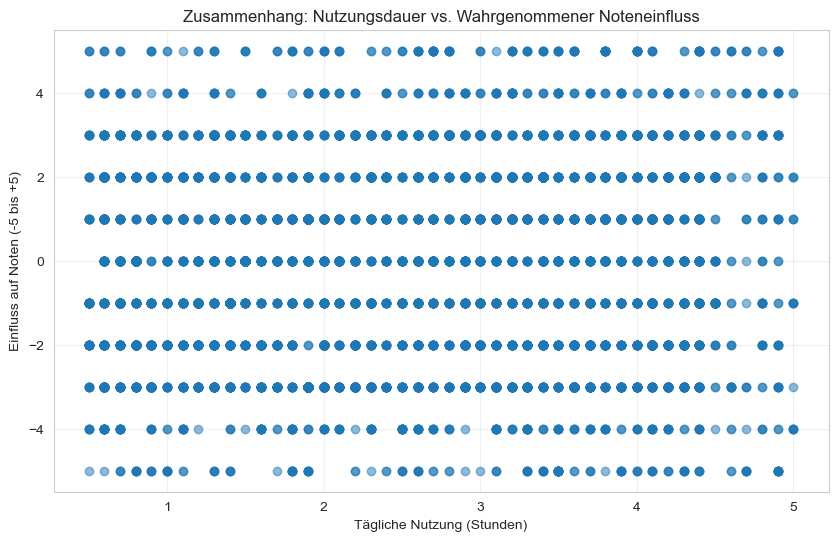

In [94]:
# Beispiel: Scatter Plot (numerisch vs. numerisch)
plt.figure(figsize=(10, 6))
plt.scatter(df['Daily_Usage_Hours'], df['Impact_on_Grades'], alpha=0.5)
plt.title('Zusammenhang: Nutzungsdauer vs. Wahrgenommener Noteneinfluss')
plt.xlabel('Tägliche Nutzung (Stunden)')
plt.ylabel('Einfluss auf Noten (-5 bis +5)')
plt.grid(True, alpha=0.3)
plt.show()


C:\Users\Sinella\AppData\Local\Temp\ipykernel_12268\3493225861.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Sinella\AppData\Local\Temp\ipykernel_12268\3493225861.py:11: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



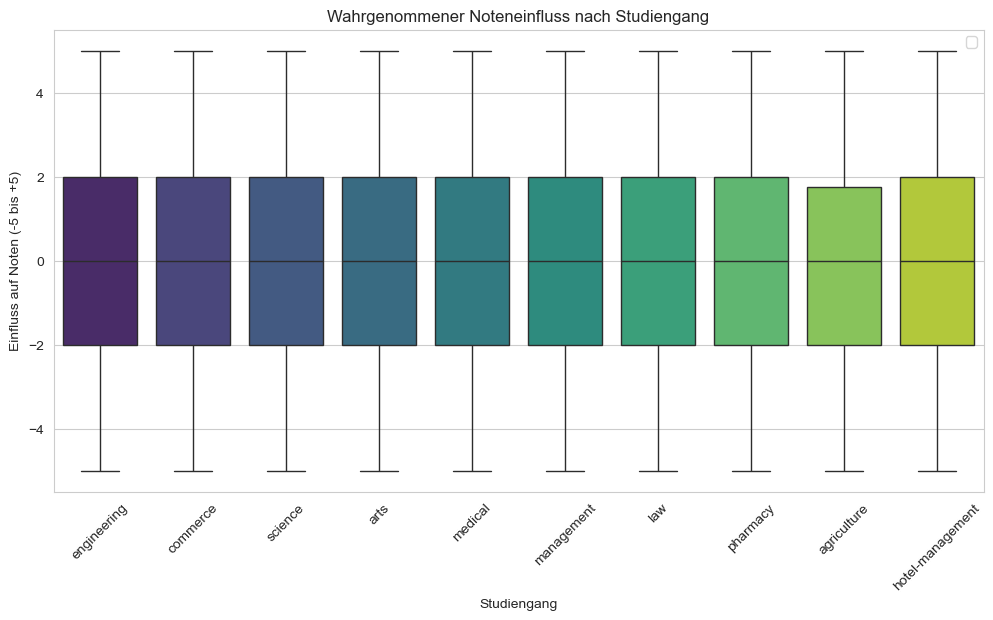

In [95]:
# Beispiel: Boxplot nach Kategorien
# Hypothese: Der Studiengang beeinflusst, wie nützlich KI wahrgenommen wird.
plt.figure(figsize=(12, 6))

sns.boxplot(data=df_students, x='Stream', y='Impact_on_Grades', palette='viridis')

plt.title('Wahrgenommener Noteneinfluss nach Studiengang')
plt.xlabel('Studiengang')
plt.ylabel('Einfluss auf Noten (-5 bis +5)')

plt.legend()
plt.xticks(rotation=45)
plt.show()


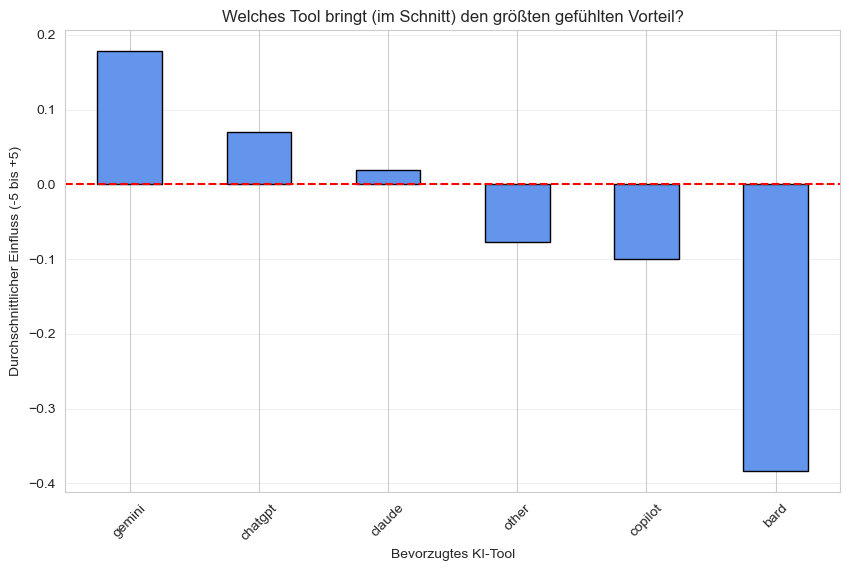

In [96]:
# Grouped Bar Chart: Durchschnittlicher Noten-Einfluss nach Tool
# Wir gruppieren nach Tool und berechnen den Mittelwert (mean) des Impacts
grouped_data = df_students.groupby('Preferred_AI_Tool')['Impact_on_Grades'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))

grouped_data.plot(kind='bar', color='cornflowerblue', edgecolor='black')

plt.title('Welches Tool bringt (im Schnitt) den größten gefühlten Vorteil?')
plt.xlabel('Bevorzugtes KI-Tool')
plt.ylabel('Durchschnittlicher Einfluss (-5 bis +5)')

plt.axhline(0, color='red', linestyle='--', label='Neutral')

plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()


In [97]:
pivot = df_students.pivot_table(index="Daily_Usage_Hours", columns="Impact_on_Grades", aggfunc="size", fill_value=0)


fig = px.imshow(pivot,
                text_auto=True,
                color_continuous_scale='RdBu_r',
                title='Korrelationsmatrix: Grid - Result',

                )

fig.update_layout(
    xaxis_title='Zielposition', 
    yaxis_title='Pitstop-Startposition' 
)

fig.show()

---
## 5. Korrelationsanalyse

**Aufgabe:** Untersuchen Sie Korrelationen zwischen numerischen Variablen.

**Visualisierungen:**
- Korrelationsmatrix als Heatmap
- Pairplot für ausgewählte Variablen

**Hinweis:** Korrelationen zeigen nur lineare Beziehungen!

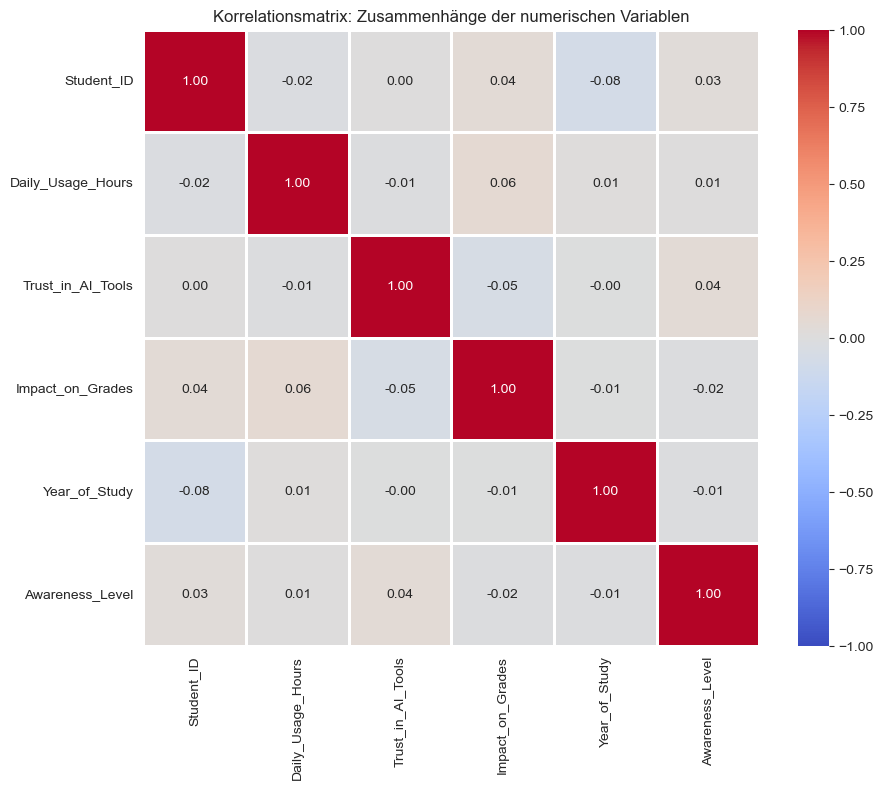

In [98]:
# Korrelationsmatrix berechnen
# correlation_matrix = df[numeric_cols].corr()

# Heatmap der Korrelationen
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
#             square=True, linewidths=1, fmt='.2f')
# plt.title('Korrelationsmatrix')
# plt.show()


numeric_df = df_students.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, fmt='.2f', vmin=-1, vmax=1)
plt.title('Korrelationsmatrix: Zusammenhänge der numerischen Variablen')
plt.show()


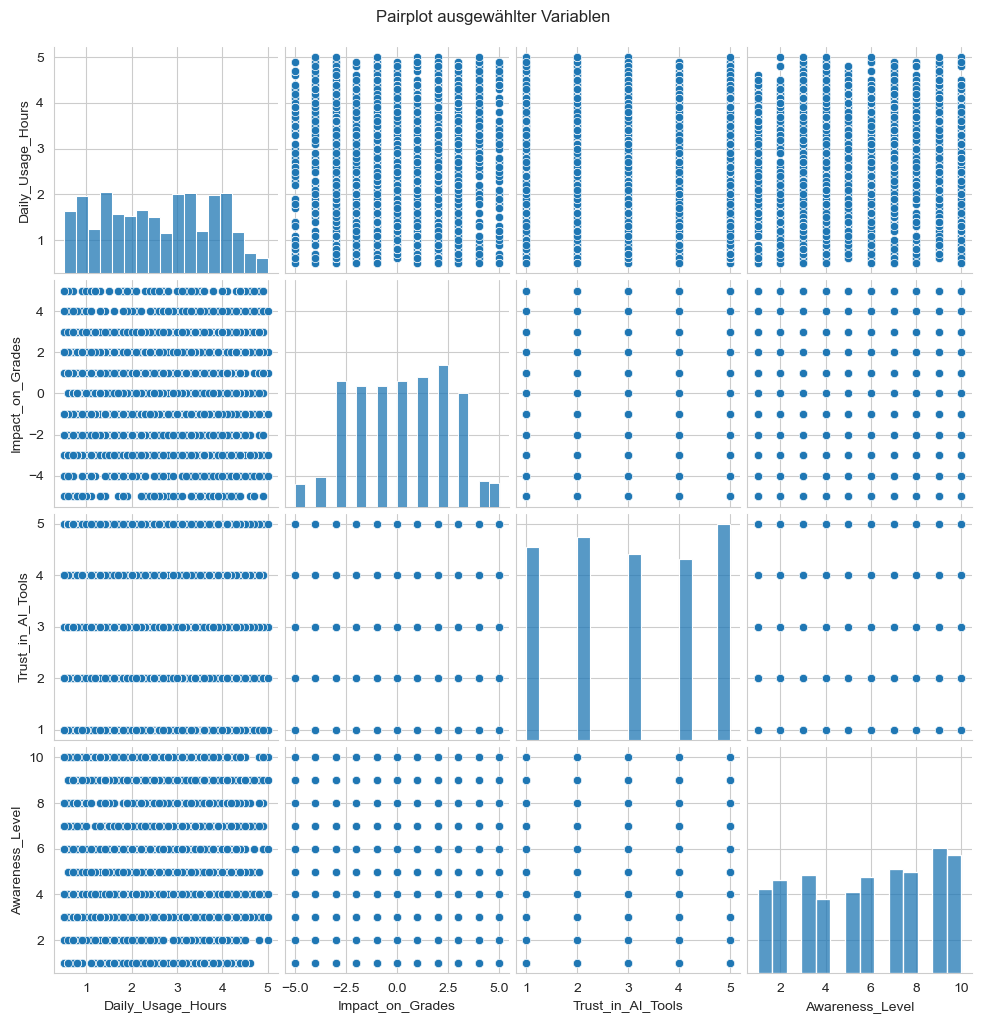

In [99]:
# Optional: Pairplot für ausgewählte Variablen
selected_cols = ['Daily_Usage_Hours', 'Impact_on_Grades', 'Trust_in_AI_Tools', 'Awareness_Level']
# selected_cols = ['spalte1', 'spalte2', 'spalte3', 'spalte4']
sns.pairplot(df_students[selected_cols])
plt.suptitle('Pairplot ausgewählter Variablen', y=1.02)
plt.show()


---
## 6. Multivariate Analysen

**Aufgabe:** Visualisieren Sie Beziehungen zwischen mehreren Variablen gleichzeitig.

**Mögliche Visualisierungen:**
- Scatter Plots mit Farb- oder Größenkodierung
- Facet Grids (mehrere Subplots)
- Stacked Bar Charts
- Bubble Charts

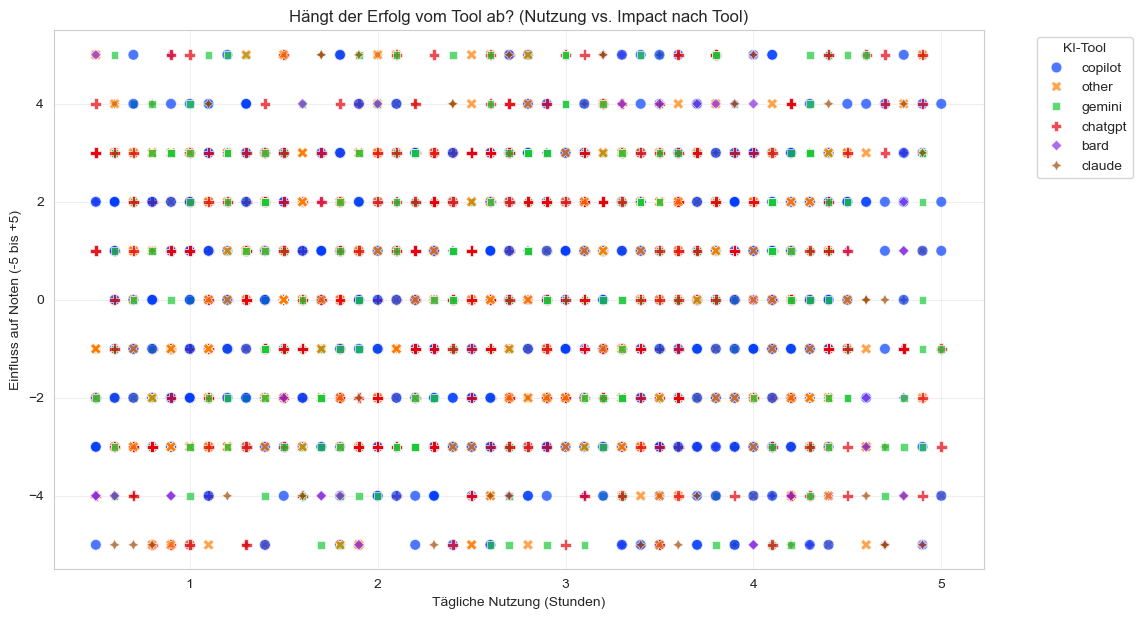

In [100]:
# Beispiel: Scatter Plot mit Farbkodierung
# plt.figure(figsize=(12, 6))
# for category in df['kategoriale_spalte'].unique():
#     subset = df[df['kategoriale_spalte'] == category]
#     plt.scatter(subset['spalte1'], subset['spalte2'], label=category, alpha=0.6)
# plt.title('Beziehung mit Kategorisierung')
# plt.xlabel('[Spalte1]')
# plt.ylabel('[Spalte2]')
# plt.legend()
# plt.show()

plt.figure(figsize=(12, 7))

sns.scatterplot(data=df_students, x='Daily_Usage_Hours', y='Impact_on_Grades', 
                hue='Preferred_AI_Tool', style='Preferred_AI_Tool', 
                palette='bright', s=60, alpha=0.7)

plt.title('Hängt der Erfolg vom Tool ab? (Nutzung vs. Impact nach Tool)')
plt.xlabel('Tägliche Nutzung (Stunden)')
plt.ylabel('Einfluss auf Noten (-5 bis +5)')
plt.legend(title='KI-Tool', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()


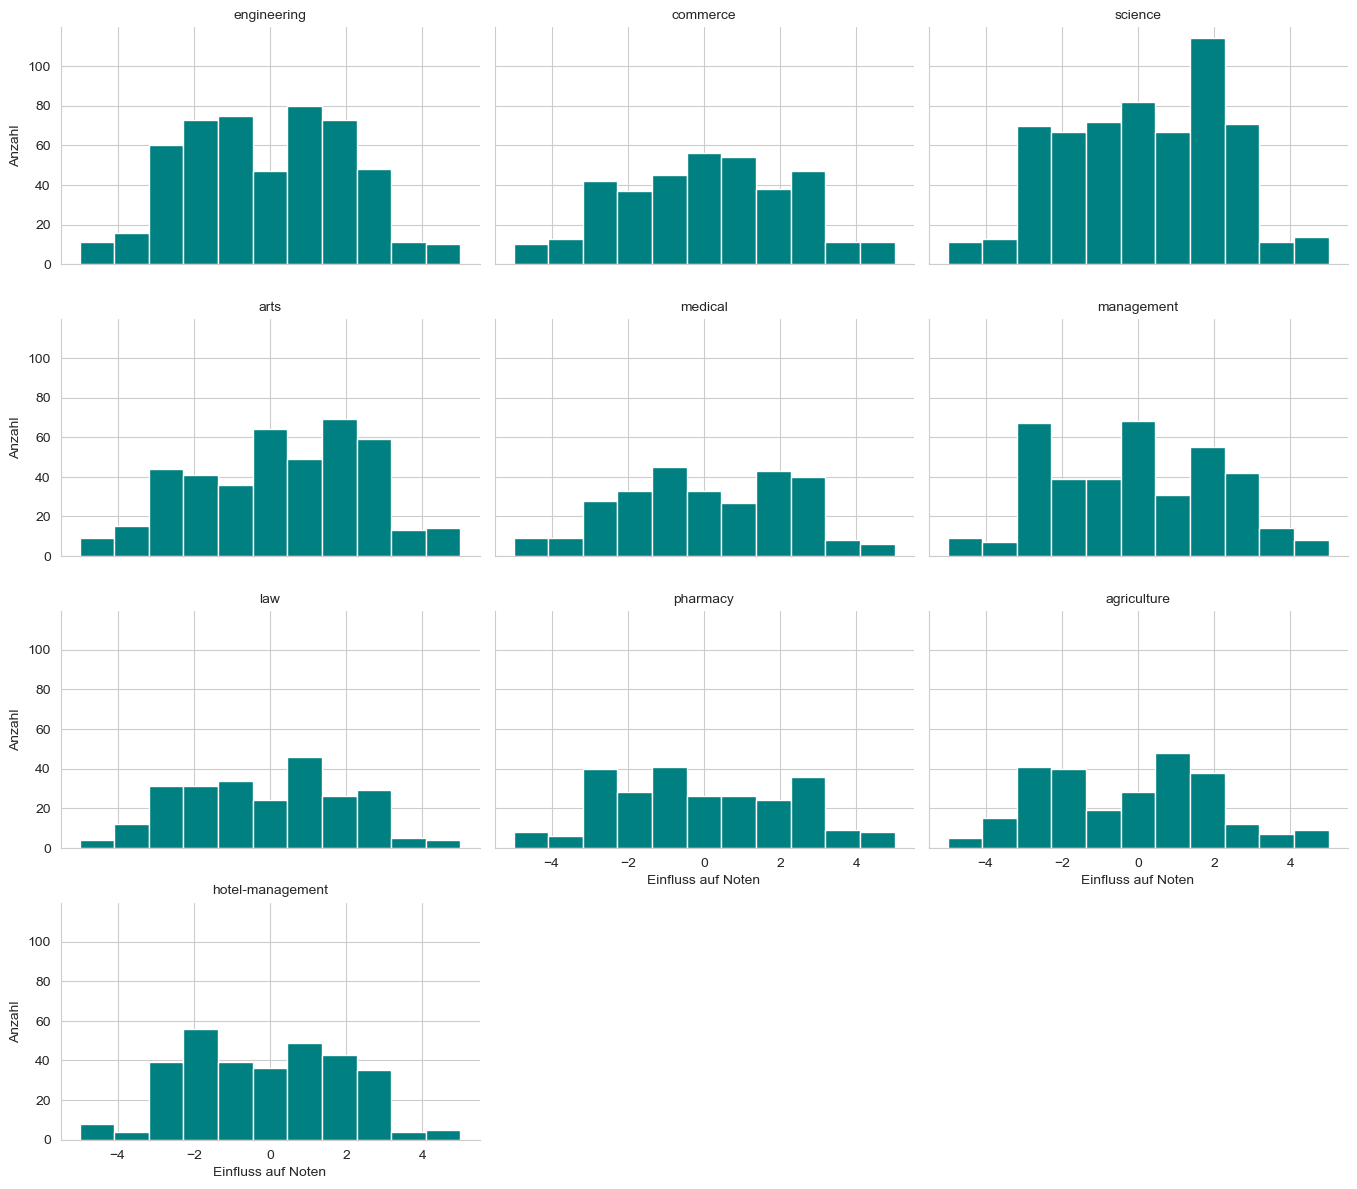

In [101]:
# Beispiel: Seaborn FacetGrid
g = sns.FacetGrid(df_students, col='Stream', col_wrap=3, height=3, aspect=1.5)
# g.map(plt.hist, 'numerische_spalte', bins=20)
# g.set_axis_labels('[Numerische Spalte]', 'Häufigkeit')
# g.set_titles(col_template='{col_name}')
# plt.show()

g.map(plt.hist, 'Impact_on_Grades', bins=11, color='teal', edgecolor='white')
g.set_axis_labels('Einfluss auf Noten', 'Anzahl')
g.set_titles(col_template='{col_name}')
plt.show()

---
## 7. Interaktive Visualisierungen mit Plotly (Bonus!)

**Aufgabe:** Erstellen Sie interaktive Visualisierungen mit Plotly.

**Vorteile von interaktiven Plots:**
- Zoom- und Pan-Funktionen
- Hover-Informationen
- Dynamische Filter
- Bessere Exploration komplexer Daten

**Hinweis:** Diese Plots sind besonders nützlich für Ihre Streamlit-App!

In [102]:
# Beispiel: Interaktiver Scatter Plot
# fig = px.scatter(df, 
#                  x='spalte1', 
#                  y='spalte2',
#                  color='kategoriale_spalte',
#                  size='spalte3',  # optional: Größe nach dritter Variable
#                  hover_data=['spalte4', 'spalte5'],  # zusätzliche Infos beim Hovern
#                  title='Interaktiver Scatter Plot')
# fig.show()



fig = px.scatter(df_students,
                 x='Daily_Usage_Hours',
                 y='Impact_on_Grades',
                 color='Stream',          
                 hover_data=['Preferred_AI_Tool', 'Use_Cases'],
                 title='Multivariate Analyse: Nutzung, Impact, Studiengang & Vertrauen',
                 size_max=15,
                 opacity=0.5)

fig.show()

In [103]:
# Beispiel: Interaktives Histogramm
# fig = px.histogram(df, 
#                    x='numerische_spalte',
#                    color='kategoriale_spalte',
#                    marginal='box',  # Boxplot am Rand
#                    title='Interaktives Histogramm')
# fig.show()


In [104]:
# Beispiel: Interaktiver Box Plot
# fig = px.box(df, 
#              x='kategoriale_spalte', 
#              y='numerische_spalte',
#              color='kategoriale_spalte',
#              title='Interaktiver Box Plot')
# fig.show()


In [105]:
# Optional: Interaktive Korrelationsmatrix
# fig = px.imshow(correlation_matrix,
#                 text_auto=True,
#                 color_continuous_scale='RdBu_r',
#                 title='Interaktive Korrelationsmatrix')
# fig.show()


---
## 8. Visualisierungen für Ihre Forschungsfrage

**Aufgabe:** Nachdem Sie in den Aufgaben 1-7 "experimentiert" haben, erstellen Sie jetzt spezifische Visualisierungen, die Ihre Forschungsfrage beantworten.

**Überlegen Sie:**
- Welche Variablen sind für Ihre Forschungsfrage am wichtigsten?
- Welche Visualisierungen zeigen die relevanten Muster am besten?
- Welche Insights können Sie aus den Daten gewinnen?

**Erstellen Sie mindestens 3 aussagekräftige Visualisierungen!**

C:\Users\Sinella\AppData\Local\Temp\ipykernel_12268\2166157784.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Sinella\AppData\Local\Temp\ipykernel_12268\2166157784.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




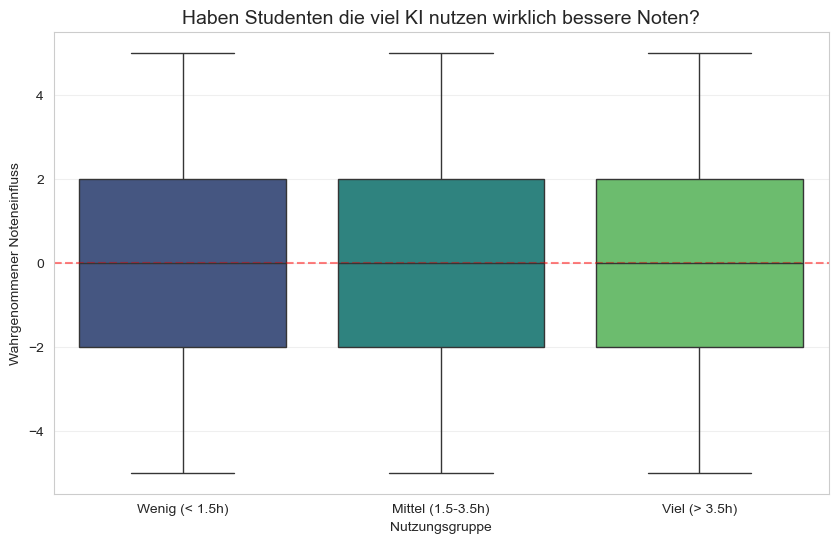

In [106]:
# Visualisierung 1:
df_students['Usage_Group'] = pd.cut(df_students['Daily_Usage_Hours'], #cut --> alles in passende schublade 0,8 zu 1,5 usw.
                           bins=[0, 1.5, 3.5, 6], 
                           labels=['Wenig (< 1.5h)', 'Mittel (1.5-3.5h)', 'Viel (> 3.5h)'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_students, x='Usage_Group', y='Impact_on_Grades', palette='viridis')

plt.title('Haben Studenten die viel KI nutzen wirklich bessere Noten?', fontsize=14)
plt.xlabel('Nutzungsgruppe')
plt.ylabel('Wahrgenommener Noteneinfluss')
plt.axhline(0, color='red', linestyle='--', alpha=0.5, label='Neutral') # Nulllinie
plt.grid(axis='y', alpha=0.3)
plt.savefig('VielKiBessereNoten.png', dpi=300, bbox_inches='tight')
plt.show()


**Interpretation Visualisierung 1:**
- Die Boxplots liegen für alle drei Gruppen auf fast identischem Niveau (Median bei 0). Dies zeigt, dass eine längere Nutzungsdauer allein nicht automatisch zu einer besseren Wahrnehmung der Studienleistung führt.

C:\Users\Sinella\AppData\Local\Temp\ipykernel_12268\831932437.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




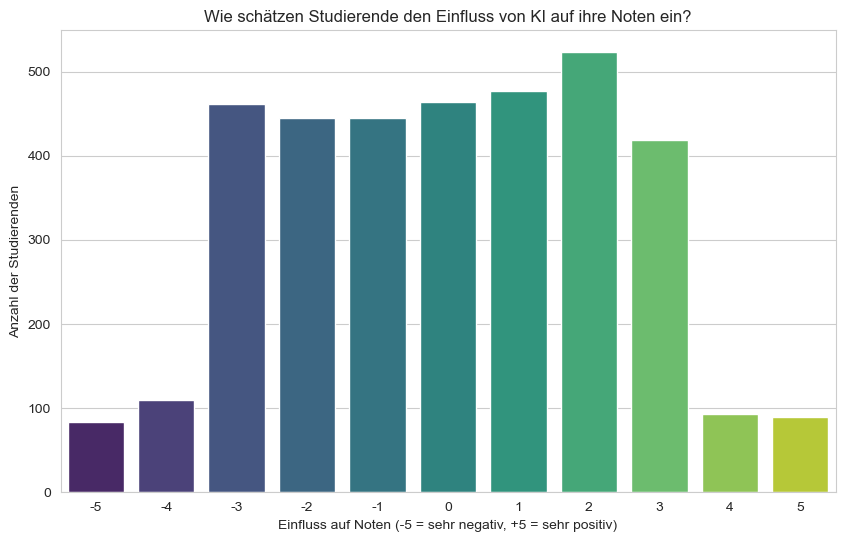

In [107]:
# Visualisierung 2:
# Verteilung des Einflusses auf die Noten
plt.figure(figsize=(10, 6))
sns.countplot(data=df_students, x='Impact_on_Grades', palette='viridis')
plt.title('Wie schätzen Studierende den Einfluss von KI auf ihre Noten ein?')
plt.xlabel('Einfluss auf Noten (-5 = sehr negativ, +5 = sehr positiv)')
plt.ylabel('Anzahl der Studierenden')
plt.savefig('StudiEinschätzungNotenKI.png', dpi=300, bbox_inches='tight')
plt.show()




**Interpretation Visualisierung 2:**
- Die Grafik zeigt eine breite Streuung der Meinungen. Zwar liegt der häufigste Einzelwert bei +2, jedoch gibt es fast ebenso viele extrem negative (-5) wie extrem positive (+5) Einschätzungen. Das belegt, dass KI keinen universellen Erfolg garantiert, sondern polarisiert: Für eine große Gruppe scheint sie sehr nützlich zu sein, für eine andere Gruppe hinderlich.

C:\Users\Sinella\AppData\Local\Temp\ipykernel_12268\148435118.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




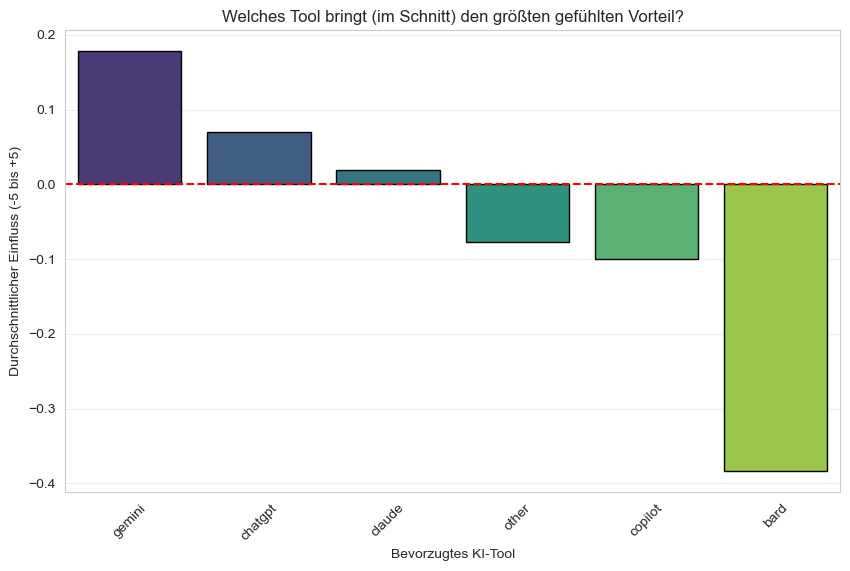

In [108]:
# Visualisierung 3:
grouped_data = df_students.groupby('Preferred_AI_Tool')['Impact_on_Grades'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))

sns.barplot(x=grouped_data.index, y=grouped_data.values, palette='viridis', edgecolor='black')

plt.title('Welches Tool bringt (im Schnitt) den größten gefühlten Vorteil?')
plt.xlabel('Bevorzugtes KI-Tool')
plt.ylabel('Durchschnittlicher Einfluss (-5 bis +5)')

# Rote Nulllinie
plt.axhline(0, color='red', linestyle='--', label='Neutral')

plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.savefig('KITools.png', dpi=300, bbox_inches='tight')
plt.show()




**Interpretation Visualisierung 3:**
- Die Grafik zeigt leichte Unterschiede zwischen den Anbietern. Während Nutzer von Gemini und ChatGPT im Schnitt eine minimale Verbesserung wahrnehmen (Werte > 0), berichten Nutzer von Copilot und Bard tendenziell eher von negativen Effekten.
- Die Durchschnittswerte sind insgesamt sehr gering (Range nur von ca. -0,4 bis +0,2 auf einer Skala von -5 bis +5). Das bedeutet, dass sich extrem positive und negative Meinungen innerhalb jeder Tool-Gruppe fast gegenseitig aufheben. Es gibt also kein "Wundermittel". Der Erfolg hängt vermutlich weniger vom Tool selbst ab, sondern eher von der individuellen Kompetenz der Studierenden.

C:\Users\Sinella\AppData\Local\Temp\ipykernel_12268\91539617.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




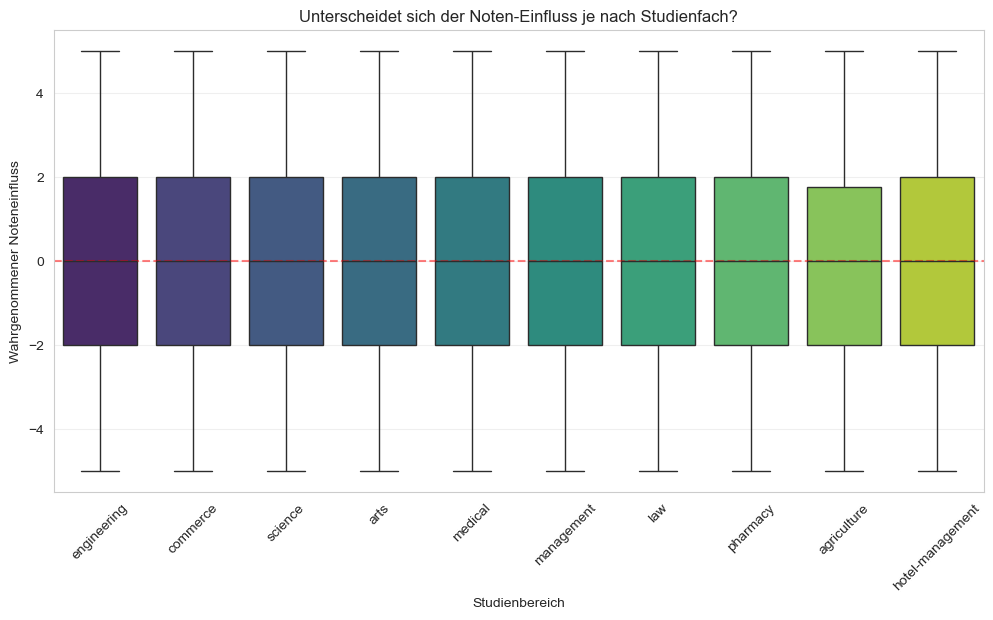

In [109]:
# Weitere Visualisierungen nach Bedarf
plt.figure(figsize=(12, 6))

sns.boxplot(data=df_students, x='Stream', y='Impact_on_Grades', palette='viridis')

plt.title('Unterscheidet sich der Noten-Einfluss je nach Studienfach?')
plt.xlabel('Studienbereich')
plt.ylabel('Wahrgenommener Noteneinfluss')
plt.axhline(0, color='red', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.savefig('Studiengang.png', dpi=300, bbox_inches='tight')
plt.show()


**Interpretation Visualisierung 4:**
- Die Grafik zeigt das es in dem zugrunde liegenden Datensatz keinen Unterschied zwischen den Studienfächern gibt, was den wahrgenommenen Noteneinfluss angeht. Nur im Agriculture Studiengang gibt es eine kleine Abweichung ins negative.

In [110]:
# # Welcher Anwendungsfall bringt den meisten Erfolg?

# case_impact = df_students.groupby('Use_Cases')['Impact_on_Grades'].mean().sort_values(ascending=False)

# plt.figure(figsize=(12, 6))
# sns.barplot(x=case_impact.index, y=case_impact.values, palette='viridis', edgecolor='black')

# plt.title('Hängt der Erfolg vom Anwendungszweck ab?', fontsize=14)
# plt.xlabel('Anwendungsfall')
# plt.ylabel('Durchschnittlicher Noten-Einfluss')
# plt.axhline(0, color='red', linestyle='-', label='Neutral')
# plt.xticks(rotation=45)
# plt.grid(axis='y', alpha=0.3)
# plt.savefig('Anwendungszweck.png', dpi=300, bbox_inches='tight')
# plt.show()

C:\Users\Sinella\AppData\Local\Temp\ipykernel_19564\3101419016.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=case_impact.index, y=case_impact.values, palette='viridis', edgecolor='black')


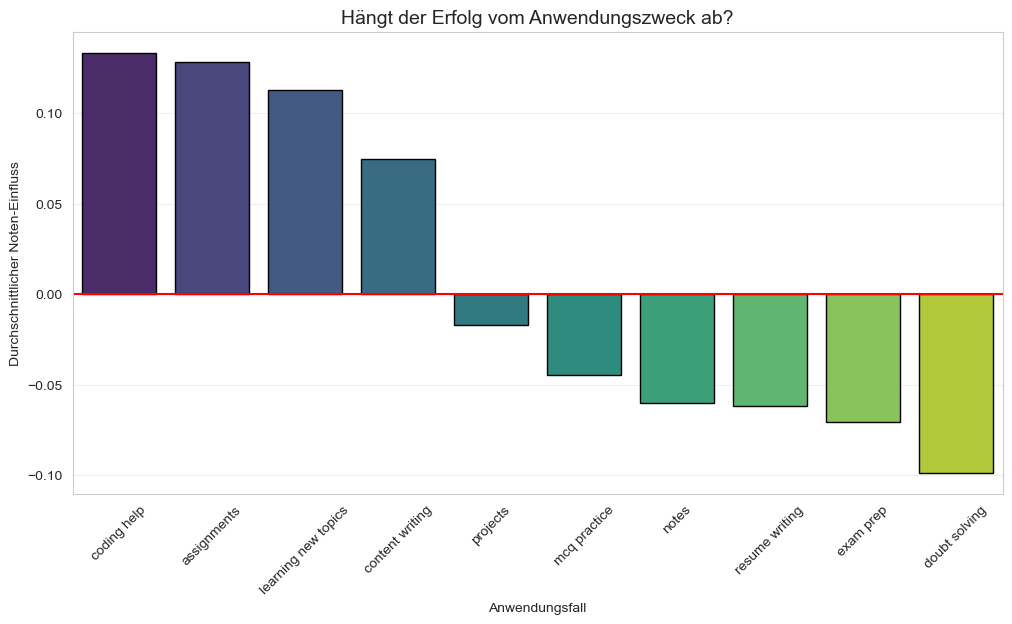


Student_Name Werte nach Bereinigung:
Student_Name
ayaan        173
rudra        173
anaya        171
vivaan       170
arjun        169
siya         167
reyansh      166
aarav        166
kabir        166
atharv       165
sneha        165
kavya        165
ramya        165
neha         164
vihaan       163
ishaan       163
riya         162
om           162
prisha       162
pooja        162
myra         161
meera        161
divya        160
nandini      160
rakhi        160
aditya       159
diya         158
aarohi       158
krishna      158
pari         158
navya        158
sai          157
ira          157
anika        156
aadhya       155
dhruv        154
aishwarya    153
ishita       152
saanvi       151
shreya       151
Name: count, dtype: int64

College_Name Werte nach Bereinigung:
College_Name
national institute of technology                                  413
indian institute of technology                                    298
indian institute of information technology          

In [4]:
# Welcher Anwendungsfall bringt den meisten Erfolg?
#Ich hatte hier erst den falschen DF genutzt
df_useCase = pd.read_csv('use_case.csv')

case_impact = df_useCase.groupby('Use_Cases')['Impact_on_Grades'].mean().sort_values(ascending=False) #df_useCase --> damit alle cases berücksichtigt werden

plt.figure(figsize=(12, 6))
sns.barplot(x=case_impact.index, y=case_impact.values, palette='viridis', edgecolor='black')

plt.title('Hängt der Erfolg vom Anwendungszweck ab?', fontsize=14)
plt.xlabel('Anwendungsfall')
plt.ylabel('Durchschnittlicher Noten-Einfluss')
plt.axhline(0, color='red', linestyle='-', label='Neutral')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.savefig('Anwendungszweck.png', dpi=300, bbox_inches='tight')
plt.show()


categorical_cols = df_useCase.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"\n{col} Werte nach Bereinigung:")
    print(df_useCase[col].value_counts())

---
## 9. Visualisierungen speichern

**Aufgabe:** Speichern Sie Ihre wichtigsten Visualisierungen als Bilddateien.

**Hinweise:**
- Speichern Sie Plots in hoher Qualität (dpi=300)
- Verwenden Sie aussagekräftige Dateinamen
- Diese Bilder können Sie in Präsentationen oder Berichten verwenden
- Für Streamlit: Visualisierungen werden direkt im Code erstellt, nicht als Bilder eingebunden

In [112]:
# Beispiel: Matplotlib/Seaborn Plot speichern
# plt.figure(figsize=(10, 6))
# # ... Ihr Plot-Code ...
# plt.savefig('plot_name.png', dpi=300, bbox_inches='tight')
# plt.show()
# grouped_data = df_students.groupby('Preferred_AI_Tool')['Impact_on_Grades'].mean().sort_values(ascending=False)

# plt.figure(figsize=(10, 6))

# sns.barplot(x=grouped_data.index, y=grouped_data.values, palette='viridis', edgecolor='black')

# plt.title('Welches Tool bringt (im Schnitt) den größten gefühlten Vorteil?')
# plt.xlabel('Bevorzugtes KI-Tool')
# plt.ylabel('Durchschnittlicher Einfluss (-5 bis +5)')

# # Rote Nulllinie
# plt.axhline(0, color='red', linestyle='--', label='Neutral')

# plt.xticks(rotation=45)
# plt.grid(axis='y', alpha=0.3)
# plt.savefig('Studiengang.png', dpi=300, bbox_inches='tight')
# plt.show()



In [113]:
# Beispiel: Plotly Plot als HTML speichern (für interaktive Nutzung)
# fig = px.scatter(...)  # Ihr Plotly Plot
# fig.write_html('interactive_plot.html')


---
## 10. Qualitätskontrolle durch Visualisierung

**Aufgabe:** Nutzen Sie Visualisierungen zur Qualitätskontrolle Ihrer Daten.

**Prüfen Sie:**
- Sind alle Ausreißer sinnvoll?
- Gibt es unerwartete Muster?
- Sind kategoriale Variablen konsistent kodiert?
- Gibt es offensichtliche Datenfehler?

**Falls Sie Probleme entdecken:** Gehen Sie zurück zu Ihrem Data Cleaning Notebook und korrigieren Sie diese!

C:\Users\Sinella\AppData\Local\Temp\ipykernel_12268\407506916.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Sinella\AppData\Local\Temp\ipykernel_12268\407506916.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




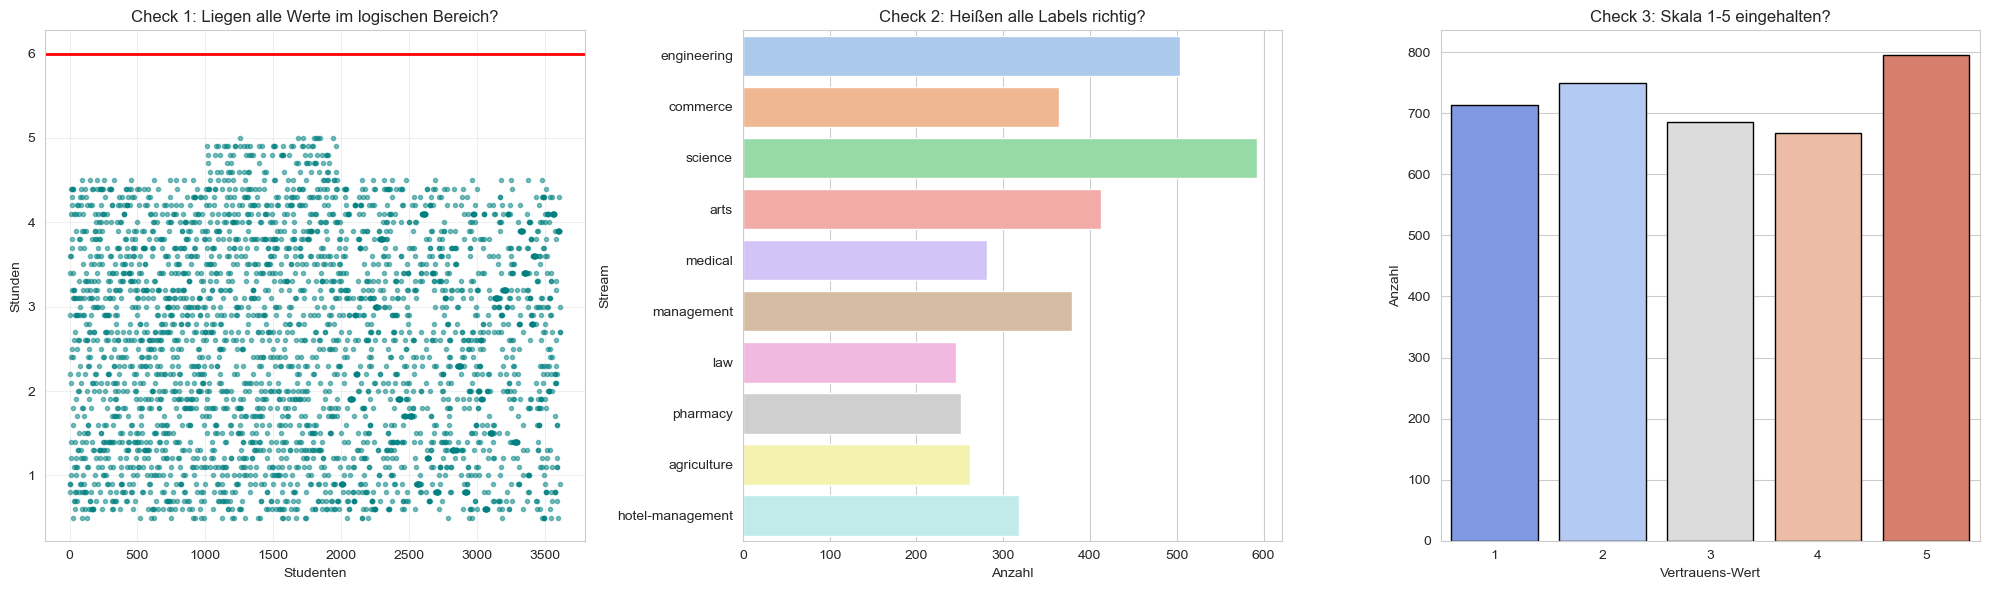

In [114]:
# 10. Qualitätskontrolle durch Visualisierung (Alternative)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Check 1: Ist die Zeitliche Nutzung plausibel?
axes[0].plot(df_students['Daily_Usage_Hours'].values, '.', color='teal', alpha=0.5) #values wichtig, sonst 9000 studis wegen explode
axes[0].set_title('Check 1: Liegen alle Werte im logischen Bereich?')
axes[0].set_ylabel('Stunden')
axes[0].set_xlabel('Studenten')

axes[0].axhline(6, color='red', linestyle='-', linewidth=2, label='6 Stunden')
axes[0].grid(True, alpha=0.3)


#Check 2: Konsistenz der Kategorien
sns.countplot(data=df_students, y='Stream', palette='pastel', ax=axes[1])
axes[1].set_title('Check 2: Heißen alle Labels richtig?')
axes[1].set_xlabel('Anzahl')


#Check 3: Skala eingehalten
sns.countplot(data=df_students, x='Trust_in_AI_Tools', palette='coolwarm', ax=axes[2], edgecolor='black')
axes[2].set_title('Check 3: Skala 1-5 eingehalten?')
axes[2].set_xlabel('Vertrauens-Wert')
axes[2].set_ylabel('Anzahl')


plt.tight_layout()
plt.show()

**Beobachtungen aus der Qualitätskontrolle:**
- Alles ok

---
## Reflexion

**Dokumentieren Sie Ihre Arbeit:**

Beantworten Sie folgende Fragen:

1. Welche Visualisierungen waren am aufschlussreichsten für Ihre Forschungsfrage?
2. Welche unerwarteten Muster oder Erkenntnisse haben Sie entdeckt?
3. Welche Visualisierungstypen eignen sich am besten für Ihren Datensatz?
4. Welche Visualisierungen planen Sie für Ihre Streamlit-App zu verwenden?
5. Gab es Herausforderungen bei der Visualisierung? Wie haben Sie diese gelöst?
6. Haben die Visualisierungen neue Fragen aufgeworfen oder Ideen für weitere Analysen gegeben?

### Ihre Reflexion:

1. **Aufschlussreichste Visualisierungen:**
   - Am aufschlussreichsten waren die gruppierten Boxplots. Sie haben meine ursprüngliche Hypothese "Viel hilft viel" visuell widerlegt, da die Mediane aller Gruppen identisch auf der Nulllinie lagen
   - Barplot zu den Anwendungsfällen war entscheidend. Er zeigt als einzige Grafik klare Unterschiede im wahrgenommenen Erfolg.

2. **Unerwartete Erkenntnisse:**
   - Es gibt kaum korrelierende Faktoren. Weder die Nutzungsdauer noch der Studiengang haben einen signifikanten Einfluss auf die wahrgenommene Leistungsverbesserung. Auch die Wahl des Tools ist fast irrelevant, alle populären Modelle schneiden durchschnittlich sehr ähnlich ab.
   -Korrelationsmatrix hat gezeigt, keine linearen Zusammenhänge.
    - Studierende, die KI nutzen, um konkrete Ergebnisse zu produzieren (Code schreiben, Hausaufgaben lösen), empfinden eine deutliche Verbesserung ihrer Noten. 
   - Studierende, die KI nutzen, um den Stoff zu verstehen oder sich auf Prüfungen vorzubereiten, empfinden eher eine Verschlechterung.
3. **Geeignetste Visualisierungstypen:**
   - Viele meiner wichtigen Daten sind numerisch, daher eigneten sich Boxplots und Bar Charts deutlich besser als klassische Scatterplots. Bei Scatterplots hatte ich außerdem das Problem, das die Punkte alle stark übereinander waren.

4. **Geplante Visualisierungen für Streamlit:**
   - Interaktive Filterung nach Studiengängen, um zu sehen, ob Studiengänge anders KI nutzen

5. **Herausforderungen und Lösungen:**
   -  Matplotlib nutzt beim Plotten scheinbar standardmäßig den Index als x-Achse nutzt, was nach dem Entfernen von Duplikaten zu verzerrten Achsen führte --> Lösung: .values nutzen.
   - Verwirrungsgefahr zwischen der Analyse von Personen (3.611) und Nutzungen (9.357) zu unterscheiden, um statistisch korrekte Aussagen zu treffen.

6. **Neue Fragen und Ideen:**
   -

---
## Zusammenfassung und nächste Schritte

**Sie haben in dieser Übung:**
- ✅ Verschiedene Visualisierungstypen auf Ihre Daten angewendet
- ✅ Univariate, bivariate und multivariate Analysen durchgeführt
- ✅ Interaktive Visualisierungen mit Plotly erstellt
- ✅ Spezifische Visualisierungen für Ihre Forschungsfrage entwickelt
- ✅ Ihre Datenqualität visuell überprüft

**Nächste Woche (Woche 9):**
- Machine Learning Grundlagen
- Erste ML-Modelle auf Ihren Daten trainieren
- Modell-Evaluation

**Tipp:** Speichern Sie dieses Notebook gut ab - die Visualisierungen bilden die Grundlage für Ihre Streamlit-App in Woche 10 und 11!